In [1]:
# For some reason when I ask The Joker to return the likelyhoods with the samples it getts mad at me. So I'm just going
# to calculat them for my self with just the samples. To do this I need to read int he samples and then use the velocity
# equation to then find a Chi^2 likelihood.


In [26]:
from thejoker.data import RVData
from thejoker.plot import plot_rv_curves
from thejoker.sampler import compute_likelihoods
import astropy.units as u
import schwimmbad
from astropy.io import fits
from astropy.table import Table

import os

import numpy as np
import matplotlib.pyplot as plt


AllAvgSimp  = Table(fits.getdata('/home/cody/Binary Search/AllAvgSimp.fits',1))
AllVisSimp  = Table(fits.getdata('/home/cody/Binary Search/AllVisSimp.fits',1))
foo_samples = Table(fits.getdata('/home/cody/Binary Search/2M00073162-7736395/2M00073162-7736395.fits',1))

In [2]:
foo_samples 

P,M0,e,omega,jitter,K,v0
float64,float64,float64,float64,float64,float64,float64
8.046124387490321,2.1427332722162826,0.2151367696743251,4.377555925366199,0.0,0.8438161269551941,-2.5482651165161876
8.003816121549022,0.9729647978083611,0.0417630683083767,3.3703344214528363,0.0,0.6072223308562167,-2.4540796142257575
8.021233169484987,3.381534761441412,0.09518474973853276,5.66460309522862,0.0,0.7589683224159753,-2.3985298331135505
10.764634818919612,1.2487371333030406,0.4586397893169968,3.776229338804276,0.0,0.8935948515996072,-2.4327198854775376
190.25598083239709,5.1295892808171315,0.008697810772814504,3.338514290746931,0.0,0.8640569246776043,-2.7249038138561805


In [7]:
# Velocity equaiton as a function of time is
# v(t,other variables) = v0 + K[cos(omega + f) + e cos(omega)]
# cos(f) = cos(E) - e / (1 - e cos(E))
# M = 2pi t /P - M0
# M = E - e sin(E)

In [11]:
from pynverse import inversefunc

In [27]:
M = lambda t: (2.0*np.pi)*t/P - M0

In [33]:
function = lambda E: E - e*np.sin(E)

In [27]:
from scipy import optimize
def foo2(E):
    return(E - e*np.sin(E) - 2*np.pi*t/P + M0)

In [28]:
times= np.linspace(-10,100,10**5)
type(times)

numpy.ndarray

In [133]:
E_foo

array([ -0.65349297,  -0.65326862,  -0.65304427, ...,  19.73410103,
        19.73432051,  19.73453998])

NameError: name 'v_rel' is not defined

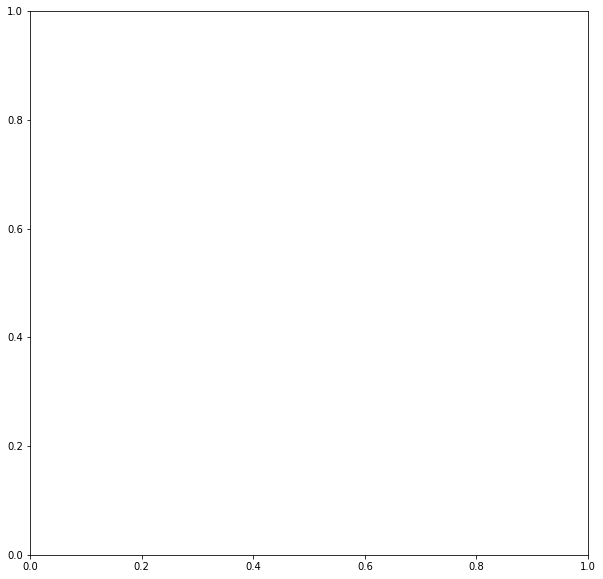

In [29]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
plt.plot(times,v_rel)

plt.show()

In [3]:
# For now lets just do this with one set of values.
n = 0
P = foo_samples['P'][n]
e = foo_samples['e'][n]
M0 = foo_samples['M0'][n]
omega = foo_samples['omega'][n]
K = foo_samples['K'][n]
v0 = foo_samples['v0'][n]

# Using a root finder to 'invert' the equation E - e*sin(E) = 2pi t/P - phi0
E_foo = np.zeros(len(times))
for n in range(len(times)):
    t = times[n]
    E_foo[n] = optimize.brentq(foo2,-100000, 100000)
    
#Now if i have an 'inverted' E array then I can find what 'f' is as a function of E
f = np.arccos((np.cos(E_foo) - e)/(1 - e*np.cos(E_foo)))
# So then the radial velocity would be....
v_rel = v0 + K * (np.cos(omega + f) + e * np.cos( omega ) )

start = 0
end = 5
name = 0
Date = AllVisSimp['JD'][start:end] - AllVisSimp['JD'][start]
RV = AllVisSimp['VHELIO'][start:end]* u.km/u.s
err = AllVisSimp['VRELERR'][start:end] * u.km/u.s
data = RVData( t = Date, rv = RV, stddev = err)
ax = data.plot()
ax.set_xlabel('Time [day]')
ax.set_ylabel('RV [km/s]')
thing = AllAvgSimp['APOGEE_ID'][name]
plt.title(thing)
plt.plot(times,v_rel)
plt.show()

NameError: name 'times' is not defined

In [229]:
E_foo

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [224]:
foo_samples['v0']

13.2257797645
13.1046662102
13.2229905097
13.158484086
13.0774262161
13.156368105
13.1630628666
13.1259400071
13.1457480409
13.1490737416
13.1819225102


In [22]:
#Trying to figure out how to use thejoker.sampler.compute_likelihoods
from thejoker.data import RVData
from thejoker.plot import plot_rv_curves
from thejoker.sampler import compute_likelihoods
import astropy.units as u
import schwimmbad
from astropy.io import fits
from astropy.table import Table
import h5py

import os

import numpy as np
import matplotlib.pyplot as plt


AllAvgSimp = Table(fits.getdata('/home/cody/Binary Search/AllAvgSimp.fits',1))
AllVisSimp   = Table(fits.getdata('/home/cody/Binary Search/AllVisSimp.fits',1))

In [7]:

start = 0
end = 0
loop = 0
name = 0

for n in AllAvgSimp['NVISITS']:
    start = end
    end = end + n
    Date = AllVisSimp['JD'][start:end] - AllVisSimp['JD'][start]
    RV = AllVisSimp['VHELIO'][start:end]* u.km/u.s
    err = AllVisSimp['VRELERR'][start:end] * u.km/u.s
    data = RVData( t = Date, rv = RV, stddev = err)
    
    from thejoker.sampler import JokerParams
    return_logprobs = True
    params = JokerParams(P_min = 8*u.day, P_max= 512*u.day)
    
    from thejoker.sampler import TheJoker
    joker = TheJoker(params)
    samples = joker.rejection_sample(data,n_prior_samples = 2**16,)
    loop += 1
    name += 1
  
    if loop > 0:
        break

INFO: 852 good samples after rejection sampling [thejoker.sampler.sampler]


In [24]:
from multiprocessing import Pool
#When I try to pass samples into the function compure_likelihoods, it gives me problems. I think this is because
#it is expecting a saved hdf5 file not a 'JokerSamples' object. So I'm goint to try to save it as an HDF5 file and
#then pass the path of the file to the function compute_likelihoods
hf = h5py.File("data.h5", 'w')
hf.create_dataset("dataset_2", data = samples)
#pool = schwimmbad.SerialPool()
#compute_likelihoods(len(samples),samples,0,data,params,pool)

TypeError: Object dtype dtype('O') has no native HDF5 equivalent

In [25]:
samples

JokerSamples([('P',
               <Quantity [ 63.85009035,  50.66803394,  37.87841098, 182.44540278,
                           69.22529456,  68.56211348,  44.02495845,  49.76566293,
                           42.16785912,  35.90805778, 452.23357416,  82.22288162,
                           66.45922437,  20.5576974 ,  45.1783223 ,  19.3244416 ,
                           50.0304867 ,  88.69735896,  69.76104462,  39.18380999,
                           50.1763486 ,  63.77447692, 199.74429203,  53.10708851,
                           52.88941753,  40.09862915,  60.89886677,  46.49208107,
                           68.48562629, 109.29119223,  84.07505432,  54.97167462,
                           46.47481342,  18.13400658,  74.56704745,  82.76037628,
                           40.06333992, 206.19151179, 126.92025546,  68.70745998,
                           51.23719293,  55.01190159, 160.79721929,  19.25340796,
                           46.90117249,  39.99858457,  43.97660657,  71.284351